In [1]:
# Load main packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting handling
import seaborn as sns # plotting handling
import altair as alt # plotting handling
import time # timer

In [2]:
# Load 
data = pd.read_csv('C:/Users/micha/OneDrive/Documents/repos/Soto Instagram test/Instagram_Data.csv')

In [3]:
# Clean/Preprocessing
data['Date Posted'] = pd.to_datetime(data['Date Posted']) # Convert to datetime
data['Type'] = data['Type'].astype('category') # Change to category
data['Day Name'] = data['Date Posted'].dt.strftime("%A") # Get day name
data['Workday'] = data['Day Name'].apply(lambda x: False if x in ['Saturday', 'Sunday'] else True) # Is workday or not

In [4]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

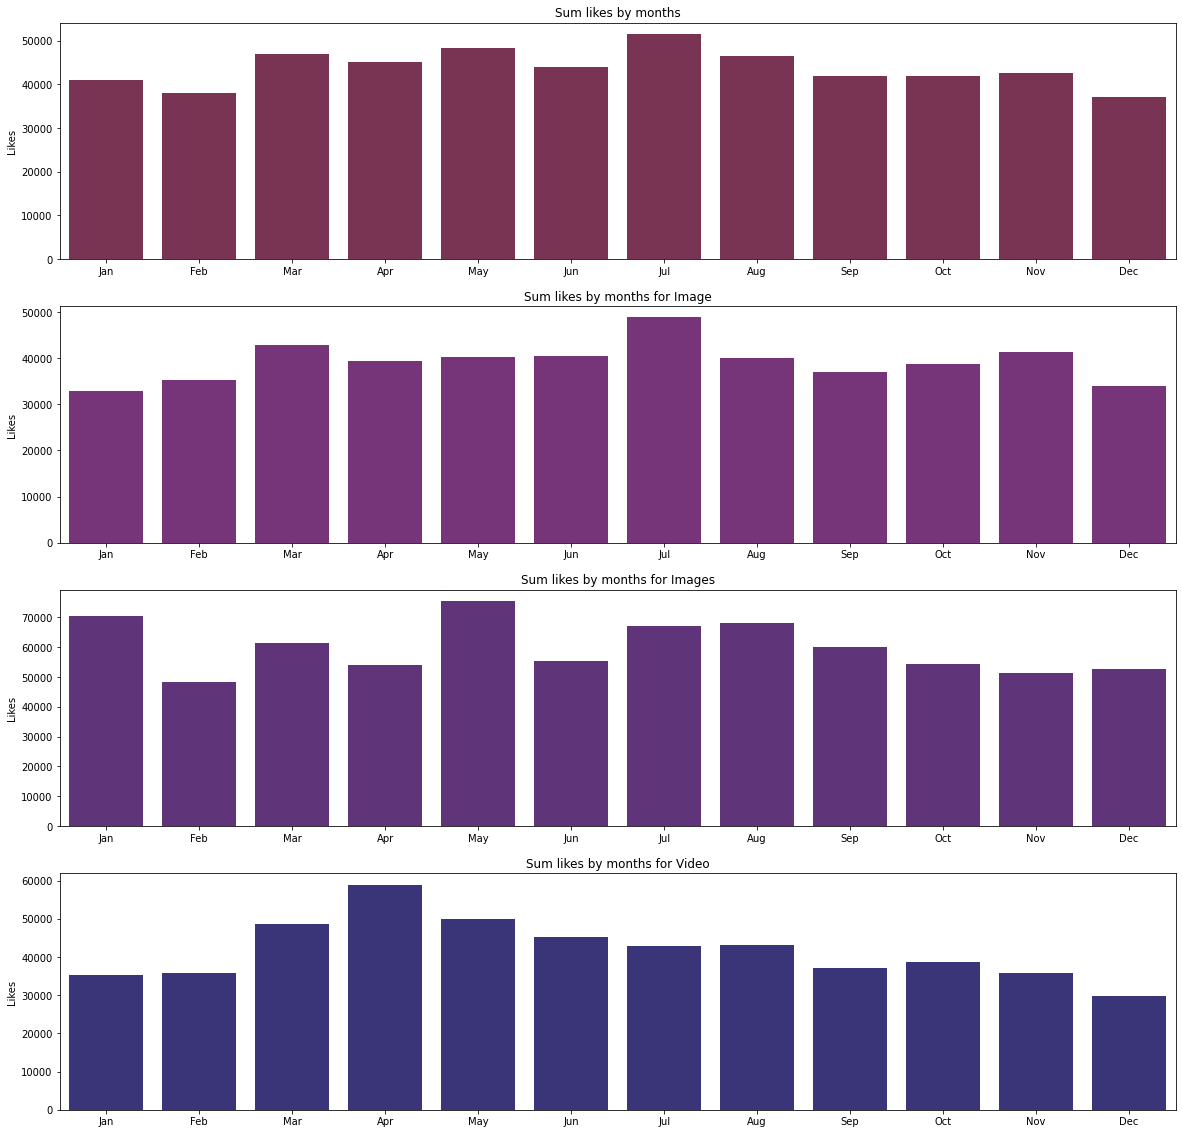

In [5]:
fig, ax = plt.subplots(4, 1, figsize=(20, 4*5))

sns.barplot(x=months, y=data.groupby('Month')['Likes'].mean(), ax=ax[0], color='#852852')
ax[0].title.set_text('Sum likes by months')

sns.barplot(x=months, y=data.query("Type == 'Image'").groupby('Month')['Likes'].mean(), ax=ax[1], color="#802885")
ax[1].title.set_text('Sum likes by months for Image')

sns.barplot(x=months, y=data.query("Type == 'Images'").groupby('Month')['Likes'].mean(), ax=ax[2], color="#632885")
ax[2].title.set_text('Sum likes by months for Images')

sns.barplot(x=months, y=data.query("Type == 'Video'").groupby('Month')['Likes'].mean(), ax=ax[3], color="#302885")
ax[3].title.set_text('Sum likes by months for Video')

plt.show()